# **Day11**

## **Multithreading**

Ex1

In [12]:
import threading

import time

def disp(thread_name):
    for i in range(5):
        # time.sleep(1)
        print(f"{thread_name} - {i}")

# Creating threads
thread1 = threading.Thread(target=disp, args=("First_Thread",))
thread2 = threading.Thread(target=disp, args=("Second_Thread",))

# Starting threads
thread1.start()
thread2.start()

# Wait for both threads to finish
thread1.join()
thread2.join()

print("All threads finished.")

First_Thread - 0
First_Thread - 1
First_Thread - 2
First_Thread - 3
First_Thread - 4
Second_Thread - 0
Second_Thread - 1
Second_Thread - 2
Second_Thread - 3
Second_Thread - 4
All threads finished.


Ex2

In [27]:
import threading
import time

def disp(thread_name):
    for i in range(5):
        time.sleep(1)
        current_thread = threading.current_thread()
        print(f"Thread Name: {current_thread.name}")
        print(f"{thread_name} - {i}")

# Creating threads
thread1 = threading.Thread(target=disp, args=("First_Thread",))
thread2 = threading.Thread(target=disp, args=("Second_Thread",))

# Starting threads
thread1.start()
thread2.start()

# Wait for both threads to finish
thread1.join()
thread2.join()

print("guess who is running main")
current_thread = threading.current_thread()
print(f"Thread Name: {current_thread.name}")
print("All threads finished.")

Thread Name: Thread-55 (disp)Thread Name: Thread-56 (disp)
Second_Thread - 0

First_Thread - 0
Thread Name: Thread-56 (disp)Thread Name: Thread-55 (disp)
First_Thread - 1

Second_Thread - 1
Thread Name: Thread-55 (disp)
First_Thread - 2
Thread Name: Thread-56 (disp)
Second_Thread - 2
Thread Name: Thread-56 (disp)Thread Name: Thread-55 (disp)
First_Thread - 3

Second_Thread - 3
Thread Name: Thread-55 (disp)
First_Thread - 4
Thread Name: Thread-56 (disp)
Second_Thread - 4
guess who is running main
Thread Name: MainThread
All threads finished.


Ex2a

In [29]:
import threading
import time

def disp():
    for i in range(5):
        time.sleep(1)
        current_thread = threading.current_thread()
        print(f"{current_thread.name} - {i}")

# Creating threads
thread1 = threading.Thread(target=disp)
thread1.name="First"
thread2 = threading.Thread(target=disp)
thread2.name="Second"

# Starting threads
thread1.start()
thread2.start()

# Wait for both threads to finish
thread1.join()
thread2.join()

print("guess who is running main")
current_thread = threading.current_thread()
print(f"Thread Name: {current_thread.name}")
print("All threads finished.")

First - 0
Second - 0
Second - 1First - 1

First - 2
Second - 2
First - 3Second - 3

First - 4Second - 4

guess who is running main
Thread Name: MainThread
All threads finished.


Ex3-Synchronization

In [151]:
"""
Shared Resource: counter is a global variable
that is shared between threads.

Lock Creation: counter_lock is a lock object
( Lock class) that will be used to synchronize
access to the counter.

So in this example,the lock is created on the instance of Lock class from the threading module. 
This lock is used to synchronize access to the shared resource, "counter".

Whenever a thread wants to modify the "counter", it must first acquire the lock using a context manager 
(with counter_lock:). This ensures that only one thread can modify counter at a time, preventing race conditions. 
When one thread holds the lock, the other thread must wait until the lock is released before it can proceed 
with its own modifications to "counter".

"""

import threading
import time

# Shared resource
counter = 0

# Create a lock
counter_lock = threading.Lock()

def increment_counter():
    global counter
    for _ in range(10):
        # Acquire the lock before accessing the shared resource
        with counter_lock:
            counter += 1
        print("Counter incrementing\t",counter)

def decrement_counter():
    global counter
    for _ in range(10,1,-1):
        # Acquire the lock before accessing the shared resource
        with counter_lock:
            counter -= 1
        print("Counter decrementing\t",counter)

# Create threads
thread1 = threading.Thread(target=increment_counter)
thread2 = threading.Thread(target=decrement_counter)

# Start threads
thread1.start()
thread2.start()

# Wait for both threads to finish
thread1.join()  # try commenting this
thread2.join()  # try commenting this

# there is no guarantee of main thread will
# complete at the end if you don't use "join"

# Final counter value
print("\n\n\n")
print(f"Final counter value: {counter}")


Counter incrementing	 1
Counter incrementing	 2
Counter incrementing	 3
Counter incrementing	 4
Counter incrementing	 5
Counter incrementing	 6
Counter incrementing	 7
Counter incrementing	 8
Counter incrementing	 9
Counter incrementing	 10
Counter decrementing	 9
Counter decrementing	 8
Counter decrementing	 7
Counter decrementing	 6
Counter decrementing	 5
Counter decrementing	 4
Counter decrementing	 3
Counter decrementing	 2
Counter decrementing	 1




Final counter value: 1


Ex4 - Synch Locking 

In [242]:
import threading
import time
class MyClass:
    def disp(self):
        # Synchronize access to this method using a lock
        with self.lock:
            for i in range(10):
                print(f"Hello\t{i}")
                time.sleep(0.01)

    def __init__(self):
        self.lock = threading.Lock()  # Create a lock for synchronization


def main():
    m1 = MyClass()  # Shared instance of MyClass
    m2 = MyClass() # try this
    thread1 = threading.Thread(target=m1.disp)
    thread2 = threading.Thread(target=m1.disp)
    # thread2 = threading.Thread(target=m2.disp)  # try this
    thread1.start()
    thread2.start()


if __name__ == "__main__":
    main()

Hello	0


Hello	1
Hello	2
Hello	3
Hello	4
Hello	5
Hello	6
Hello	7
Hello	8
Hello	9
Hello	0
Hello	1
Hello	2
Hello	3
Hello	4
Hello	5
Hello	6
Hello	7
Hello	8
Hello	9


Ex5 - Synch 

In [252]:
import threading

class MyClass:
    def ascending(self):
        # Synchronize access to this method using a lock
        with self.lock:
            for i in range(10):
                print(f"Hello\t{i}")
    def descending(self):
        # Synchronize access to this method using a lock
        with self.lock:
            for i in range(10,0,-1):
                print(f"Hello\t{i}")

    def __init__(self):
        self.lock = threading.Lock()  # Create a lock for synchronization


def main():
    
    m1 = MyClass()  # Shared instance of MyClass
    # m2 = MyClass()
    thread1 = threading.Thread(target=m1.ascending)
    thread2 = threading.Thread(target=m1.descending)

    thread1.start()
    thread2.start()


if __name__ == "__main__":
    main()

Hello	0
Hello	1
Hello	2
Hello	3
Hello	4
Hello	5
Hello	6
Hello	7
Hello	8
Hello	9
Hello	10
Hello	9
Hello	8
Hello	7
Hello	6
Hello	5
Hello	4
Hello	3
Hello	2
Hello	1


Ex6

In [253]:
import threading

class MyClass:
    def __init__(self):
        self.lock = threading.Lock()  # Create a lock for synchronization
        self.condition = threading.Condition(self.lock)  # Create a condition variable
        self.current_thread = "ascending"  # Track the current thread

    def disp(self):
        with self.lock:
                for i in range(10):
                    print(f"Ascending: {i}\t{threading.current_thread().name}")
                    if i == 5:
                        self.condition.notify()  # Notify the descending
                        self.condition.wait()  # Wait for the descending thread to finish
                self.condition.notify()


def main():
    m1 = MyClass()  # Shared instance of MyClass
    thread1 = threading.Thread(target=m1.disp, name="First_Thread")
    thread2 = threading.Thread(target=m1.disp, name="Second_Thread")

    thread1.start()
    thread2.start()

    thread1.join()
    thread2.join()

if __name__ == "__main__":
    main()

Ascending: 0	First_Thread
Ascending: 1	First_Thread
Ascending: 2	First_Thread
Ascending: 3	First_Thread
Ascending: 4	First_Thread
Ascending: 5	First_Thread
Ascending: 0	Second_Thread
Ascending: 1	Second_Thread
Ascending: 2	Second_Thread
Ascending: 3	Second_Thread
Ascending: 4	Second_Thread
Ascending: 5	Second_Thread
Ascending: 6	First_Thread
Ascending: 7	First_Thread
Ascending: 8	First_Thread
Ascending: 9	First_Thread
Ascending: 6	Second_Thread
Ascending: 7	Second_Thread
Ascending: 8	Second_Thread
Ascending: 9	Second_Thread


## **Python Logging**

**Logging** is a means of tracking events that happen when some software runs. Logging is important for software developing, debugging, and running. If you don’t have any logging record and your program crashes, there are very few chances that you detect the cause of the problem.
The simplest way of logging is to write print statements in the program to check what has gone wrong where. But the main drawback here is at the time of sending the program to the client, you have to either comment or remove those print statements. Moreover print statements appear on console only whereas logging allows you to print the log messages on the console, file as well as database.

**Python Logging Levels**

There are five built-in levels of the log message.  
- Debug: These are used to give Detailed information, typically of interest only when diagnosing problems.
- Info: These are used to confirm that things are working as expected
- Warning: These are used as an indication that something unexpected happened, or is indicative of some problem in the near future
- Error: This tells that due to a more serious problem, the software has not been able to perform some function
- Critical: This tells serious error, indicating that the program itself may be unable to continue running

Each built-in level has been assigned its numeric value.
 
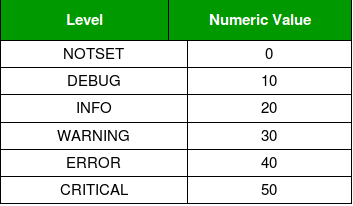

Key Components of Python Logging
- Loggers: Used to log messages. You can create custom loggers with different names and configurations.
- Handlers: Used to configure where log messages go (e.g., console, file).
- Formatters: Used to specify the format of log messages.

**How exactly log messages they works?**
- You need to set the log level i.e debug  or info oer warning or errr or critical 
     - Then you actually log the meassage/s.
    
- The message or messages will go to the level whoch is set and all the abive levels but not the lower level.
e.g. if you have set level as 'Warning'

- and if you log the message, the message will  go warning and all the above levels  ie.e  error and critical also, But the message won't go for lower levels

Ex1

Woeks correct in .py file not on notebook

In [261]:
import logging

# Set up logging level

logging.basicConfig(level=logging.DEBUG)
logging.basicConfig(level=logging.WARNING)

# Logging messages with different severity levels
logging.debug('This is a debug message')
logging.info('This is an info message')
logging.warning('This is a warning message')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


[Running] python -u "a:\CDAC_SM_VITA\4_Python\Day_11\Python_Logging\Python_Logging\Ex1.py"

DEBUG:root:This is a debug message

INFO:root:This is an info message

WARNING:root:This is a warning message

ERROR:root:This is an error message

CRITICAL:root:This is a critical message

Ex2

In [263]:
#Works well in .py file

import logging

# Set up logging to a file
logging.basicConfig(filename='first.log', level=logging.DEBUG)

logging.debug('Debug message written to file')
logging.info('Info message written to file')

Ex3

In [264]:
"""
asctime is "ASCII time." It refers to a string
representation of the date and time in a human-readable
format, typically including the year, month, day, hour,
minute, and second. This format is used in logging
to easily convey when a particular log entry was created.

"""

import logging

# Set up logging to a file
logging.basicConfig(filename='second.log',format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)

logging.debug('Debug message written to file')
logging.warning('Warning message written to file')
logging.error('Error message written to file')

ERROR:root:Error message written to file


Ex4

In [265]:
import logging

logging.basicConfig(filename="third.log",level=logging.DEBUG, format='%(asctime)s - %(levelname)s - %(message)s')

try:
    f=open("special.txt","r")  #  this file does not exist
except FileNotFoundError:
    logging.exception('File does not exist')

ERROR:root:File does not exist
Traceback (most recent call last):
  File "C:\Users\RKC\AppData\Local\Temp\ipykernel_6792\1918799999.py", line 6, in <module>
    f=open("special.txt","r")  #  this file does not exist
      ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\RKC\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 286, in _modified_open
    return io_open(file, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
FileNotFoundError: [Errno 2] No such file or directory: 'special.txt'


Ex5

In [266]:
import logging

# Create a custom logger, it can have any name
logger = logging.getLogger('dbda_logger')
print(type(logger))
logger.setLevel(logging.DEBUG)

# Create handlers
console_handler = logging.StreamHandler()
file_handler = logging.FileHandler('main.log')

# Set level for handlers
console_handler.setLevel(logging.WARNING)
file_handler.setLevel(logging.DEBUG)

# Create a formatter and set it for the handlers
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)
file_handler.setFormatter(formatter)

# Add handlers to the logger
logger.addHandler(console_handler)
logger.addHandler(file_handler)

# Log messages
logger.debug('This is a debug message')
logger.info('This is an info message')
logger.warning('This is a warning message')
logger.error('This is an error message')
logger.critical('This is a critical message')

DEBUG:dbda_logger:This is a debug message
INFO:dbda_logger:This is an info message
2024-10-18 10:06:36,447 - dbda_logger - WARNING - This is a warning message
2024-10-18 10:06:36,450 - dbda_logger - ERROR - This is an error message
ERROR:dbda_logger:This is an error message
2024-10-18 10:06:36,452 - dbda_logger - CRITICAL - This is a critical message
CRITICAL:dbda_logger:This is a critical message


<class 'logging.Logger'>


## **Data Structure**

A data structure in programming is a way to organize, manage, and store data so that it can be accessed and modified efficiently. Different data structures provide various ways to organize data, each with its own strengths and weaknesses depending on the operations you need to perform.
Common types of data structures include:
1.	Arrays: A collection of elements identified by index or key, allowing for quick access.
2.	Linked Lists: A series of connected nodes, each containing data and a reference to the next node, facilitating dynamic memory allocation.
3.	Stacks: A collection of elements that follows the Last In, First Out (LIFO) principle, useful for managing function calls and reversing operations.
4.	Queues: A collection of elements that follows the First In, First Out (FIFO) principle, often used in scheduling tasks.
5.	Trees: Hierarchical structures consisting of nodes, with a single root from which other nodes branch out, ideal for representing hierarchical data.
6.	Graphs: Collections of nodes connected by edges, useful for representing networks like social connections or paths in maps.
Choosing the right data structure is crucial for optimizing performance in terms of speed and memory usage in programming tasks.



### **Linked List**

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None
        self.last=None
    def add(self,data):
        ref=Node(data)
        if self.head==None:
            self.head=ref
            self.last=ref
        else:
            self.last.next=ref
            self.last=ref
    def display(self):
        temp=self.head
        while temp is not None:
            print(temp.data)
            temp=temp.next
    def sort(self):
        temp=0
        prev=self.head
        cur=self.head.next

        while(prev is not self.last):
            while(cur is not None):
                if(prev.data>cur.data):
                    temp=prev.data
                    prev.data=cur.data
                    cur.data=temp
                cur=cur.next
            prev=prev.next
            cur=prev.next
    def insert(self,data):
        ref=Node(data)
        if(ref.data<self.head.data):
            ref.next=self.head
            self.head=ref
        elif(ref.data>self.last.data):
            self.last.next=ref
            self.last=ref
        else:
            prev=self.head
            cur=self.head
            while(ref.data>cur.data):
                prev=cur
                cur=prev.next
            ref.next=cur
            prev.next=ref

    # def modify(last, new):

    def delete(self,data):
        if(data==self.head.data):
            cur=self.head
            self.head=cur.next
            cur=None
        else:
            cur=self.head
            while(cur is not None):
                prev=cur
                cur=prev.next
                if(data==cur.data):
                    if(cur==self.last):
                        self.last=prev;
                        prev.next = None
                        cur=None
                    else:
                        prev.next=cur.next
                        cur=None



mylist=LinkedList()
mylist.add(45)
mylist.add(34)
mylist.add(55)
mylist.add(5)

mylist.display()
mylist.sort()
print("let's print sorted data")
mylist.display()
mylist.insert(40)
print("after inserting")
mylist.display()
mylist.delete(40)
print("after deleting in between node")
mylist.display()
mylist.delete(5)
print("after deleting first node")
mylist.display()
mylist.delete(55)
print("after deleting last node")
mylist.display()


# **Day11 - 19-10-2024**

### **Doubly LInked List**

In [2]:
class Node:
    def __init__(self, data):
        self.data = data
        self.prev=None
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None
        self.last=None
    def add(self,data):
        ref=Node(data)
        if self.head==None:
            self.head=ref
            self.last=ref
        else:
            ref.prev=self.last
            self.last.next=ref
            ref.next=self.head
            self.last=ref
            self.head.prev=self.last
    def display_from_head(self):
        if not self.head:
            print("List is empty")
            return
        temp=self.head
        while True:
            print(temp.data)
            temp=temp.next
            if(temp==self.last.next):
                break
    def display_from_last(self):
        if not self.head:
            print("List is empty")
            return
        temp = self.last
        while True:
            print(temp.data)
            temp = temp.prev
            if (temp == self.head.prev):
                break
    def sort(self):
        temp=0
        prev=self.head
        cur=self.head.next

        while(prev is not self.last):
            while(cur is not self.last.next):
                if(prev.data>cur.data):
                    temp=prev.data
                    prev.data=cur.data
                    cur.data=temp
                cur=cur.next
            prev=prev.next
            cur=prev.next
    def insert(self,data):
        ref=Node(data)
        if(ref.data<self.head.data):
            ref.next=self.head
            ref.prev=self.head.prev
            self.last.next = ref
            self.head.prev=ref
            self.head=ref
        elif(ref.data>self.last.data):
            ref.prev =self.last
            ref.next = self.last.next
            self.last.next=ref
            self.last=ref
            self.head.prev=self.last
        else:
            cur1 = self.head
            while (ref.data > cur1.data):
                cur1 = cur1.next
            ref.prev = cur1.prev
            ref.next = cur1
            cur1.prev.next = ref
            cur1.prev = ref

    def delete(self,data):
        if(data==self.head.data):
            cur=self.head
            self.head=cur.next
            self.head.prev=self.last
            self.last.next=self.head
            cur=None
        else:
            cur1 = self.head
            while (cur1 is not None):
                cur1 = cur1.next
                if (data == cur1.data):
                    if (cur1 == self.last):
                        self.last = cur1.prev;
                        self.last.next = self.head
                        self.head.prev=self.last
                        cur1 = None
                    else:
                        cur1.prev.next = cur1.next
                        cur1.next.prev = cur1.prev
                        cur1 = None



mylist=LinkedList()
mylist.add(45)
mylist.add(34)
mylist.add(55)
mylist.add(5)

print("let's print the linked list from the head")
mylist.display_from_head()
print("let's print the linked list from the tail")
mylist.display_from_last()
print("let's sort the list")
mylist.sort()
print("print the sorted data from head")
mylist.display_from_head()
print("print the sorted data from tail")
mylist.display_from_last()

mylist.insert(3)
print("After inserting in the beginning print the sorted data from head")
mylist.display_from_head()
print("After inserting in the beginning print the sorted data from tail")
mylist.display_from_last()

mylist.insert(73)
print("After inserting at the end print the sorted data from head")
mylist.display_from_head()

print("After inserting at the end print the sorted data from tail")
mylist.display_from_last()

mylist.insert(63)
print("After inserting in between print the sorted data from head")
mylist.display_from_head()
print("After inserting in between print the sorted data from the tail")
mylist.display_from_last()

mylist.delete(3)
print("after deleting first node let's print from the head")
mylist.display_from_head()
print("after deleting first node let's print from the tail")
mylist.display_from_last()

mylist.delete(73)
print("after deleting the last node let's print from the head")
mylist.display_from_head()
print("after deleting the last node let's print from the tail")
mylist.display_from_last()



mylist.delete(45)
print("after deleting the middle node let's print from the head")
mylist.display_from_head()
print("after deleting the middle node let's print from the tail")
mylist.display_from_last()



let's print the linked list from the head
45
34
55
5
let's print the linked list from the tail
5
55
34
45
let's sort the list
print the sorted data from head
5
34
45
55
print the sorted data from tail
55
45
34
5
After inserting in the beginning print the sorted data from head
3
5
34
45
55
After inserting in the beginning print the sorted data from tail
55
45
34
5
3
After inserting at the end print the sorted data from head
3
5
34
45
55
73
After inserting at the end print the sorted data from tail
73
55
45
34
5
3
After inserting in between print the sorted data from head
3
5
34
45
55
63
73
After inserting in between print the sorted data from the tail
73
63
55
45
34
5
3
after deleting first node let's print from the head
5
34
45
55
63
73
after deleting first node let's print from the tail
73
63
55
45
34
5
after deleting the last node let's print from the head
5
34
45
55
63
after deleting the last node let's print from the tail
63
55
45
34
5
after deleting the middle node let's print fro

### **Circular Doubly linked List**

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.prev=None
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None
        self.last=None
    def add(self,data):
        ref=Node(data)
        if self.head==None:
            self.head=ref
            self.last=ref
        else:
            ref.prev=self.last
            self.last.next=ref
            ref.next=self.head
            self.last=ref
            self.head.prev=self.last
    def display_from_head(self):
        if not self.head:
            print("List is empty")
            return
        temp=self.head
        while True:
            print(temp.data)
            temp=temp.next
            if(temp==self.last.next):
                break
    def display_from_last(self):
        if not self.head:
            print("List is empty")
            return
        temp = self.last
        while True:
            print(temp.data)
            temp = temp.prev
            if (temp == self.head.prev):
                break
    def sort(self):
        temp=0
        prev=self.head
        cur=self.head.next

        while(prev is not self.last):
            while(cur is not self.last.next):
                if(prev.data>cur.data):
                    temp=prev.data
                    prev.data=cur.data
                    cur.data=temp
                cur=cur.next
            prev=prev.next
            cur=prev.next
    def insert(self,data):
        ref=Node(data)
        if(ref.data<self.head.data):
            ref.next=self.head
            ref.prev=self.head.prev
            self.last.next = ref
            self.head.prev=ref
            self.head=ref
        elif(ref.data>self.last.data):
            ref.prev=self.last
            ref.next = self.last.next
            self.last.next=ref
            self.last=ref
            self.head.prev=self.last
        else:
            cur1 = self.head
            while (ref.data > cur1.data):
                cur1 = cur1.next
            ref.prev = cur1.prev
            ref.next = cur1
            cur1.prev.next = ref
            cur1.prev = ref

    def delete(self,data):
        if(data==self.head.data):
            cur=self.head
            self.head=cur.next
            self.head.prev=self.last
            self.last.next=self.head
            cur=None
        else:
            cur1 = self.head
            while (cur1 is not None):
                cur1 = cur1.next
                if (data == cur1.data):
                    if (cur1 == self.last):
                        self.last = cur1.prev;
                        self.last.next = self.head
                        self.head.prev=self.last
                        cur1 = None
                    else:
                        cur1.prev.next = cur1.next
                        cur1.next.prev = cur1.prev
                        cur1 = None



mylist=LinkedList()
mylist.add(45)
mylist.add(34)
mylist.add(55)
mylist.add(5)

print("let's print the linked list from the head")
mylist.display_from_head()
print("let's print the linked list from the tail")
mylist.display_from_last()
print("let's sort the list")
mylist.sort()
print("print the sorted data from head")
mylist.display_from_head()
print("print the sorted data from tail")
mylist.display_from_last()

mylist.insert(3)
print("After inserting in the beginning print the sorted data from head")
mylist.display_from_head()
print("After inserting in the beginning print the sorted data from tail")
mylist.display_from_last()

mylist.insert(73)
print("After inserting at the end print the sorted data from head")
mylist.display_from_head()

print("After inserting at the end print the sorted data from tail")
mylist.display_from_last()

mylist.insert(63)
print("After inserting in between print the sorted data from head")
mylist.display_from_head()
print("After inserting in between print the sorted data from the tail")
mylist.display_from_last()

mylist.delete(3)
print("after deleting first node let's print from the head")
mylist.display_from_head()
print("after deleting first node let's print from the tail")
mylist.display_from_last()

mylist.delete(73)
print("after deleting the last node let's print from the head")
mylist.display_from_head()
print("after deleting the last node let's print from the tail")
mylist.display_from_last()



mylist.delete(45)
print("after deleting the middle node let's print from the head")
mylist.display_from_head()
print("after deleting the middle node let's print from the tail")
mylist.display_from_last()

